In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w,b,num_examples):
    X=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)

In [3]:
features[0],labels[0]

(tensor([0.5468, 2.2021]), tensor([-2.1877]))

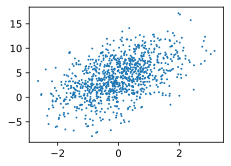

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:,0].detach().numpy(),
                labels.detach().numpy(),1)

In [5]:
help(d2l.plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single numeric RGB or RGBA sequence
    

In [6]:
# 该函数接受批量大小，特征矩阵，标签向量作为输入，生成大小为batch_size的小批量
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(
        indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,y)
    break

tensor([[ 1.0393, -0.5197],
        [-0.5162, -0.5964],
        [-0.3272, -0.5979],
        [-0.1973, -1.4205],
        [ 2.8868,  0.1292],
        [-1.0069, -0.2828],
        [-1.4740,  0.1634],
        [-0.8488,  2.3955],
        [-0.9751, -0.4517],
        [-0.6022,  2.1062]]) tensor([[ 8.0447],
        [ 5.1915],
        [ 5.5714],
        [ 8.6225],
        [ 9.5177],
        [ 3.1433],
        [ 0.7052],
        [-5.6489],
        [ 3.7984],
        [-4.1635]])


In [7]:
# 初始化模型参数
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

In [8]:
# 定义模型
def linreg(X,w,b):
    return torch.matmul(X,w)+b

In [9]:
# 定义损失函数
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [10]:
# 定义优化算法 params参数包含w和b，lr学习率,batchsize批量大小
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()

In [14]:
lr=0.01
num_epochs=10
net=linreg
loss=squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)
        #l是形状为（batchsize,1）的损失向量
        l.sum().backward()#反向传播求l对w,b的梯度
        sgd([w,b],lr,batch_size)#根据梯度更新w,b
    with torch.no_grad():
        train_l=loss(net(features,w,b),labels)
        print(f'epoch{epoch+1},loss{float(train_l.mean()):f}')

epoch1,loss0.000052
epoch2,loss0.000052
epoch3,loss0.000052
epoch4,loss0.000052
epoch5,loss0.000052
epoch6,loss0.000052
epoch7,loss0.000052
epoch8,loss0.000052
epoch9,loss0.000052
epoch10,loss0.000052


In [17]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w=torch.tensor([2,-3.4])
true_b=torch.tensor([4.2])
features,labels=d2l.synthetic_data(true_w,true_b,1000)

In [24]:
def load_array(data_arrays,batch_size,is_train=True):
    dataset=data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

batch_size=10
data_iter=load_array((features,labels),batch_size)
next(iter(data_iter))

[tensor([[-0.5532,  1.3154],
         [ 0.3327,  1.3600],
         [-1.5452, -0.4493],
         [ 0.3430, -0.2622],
         [ 0.7919,  0.6659],
         [-1.1773, -0.5299],
         [-0.3153, -2.1265],
         [-1.1813, -0.0610],
         [ 0.2076, -0.8250],
         [ 0.3765, -1.7200]]),
 tensor([[-1.3830],
         [ 0.2432],
         [ 2.6298],
         [ 5.7684],
         [ 3.5122],
         [ 3.6560],
         [10.8068],
         [ 2.0349],
         [ 7.4288],
         [10.7926]])]

In [25]:
from torch import nn

net=nn.Sequential(nn.Linear(2,1))
#list of layers

In [31]:
#初始化权重和偏差
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [32]:
#均方误差,也称为平方范数
loss=nn.MSELoss()

In [33]:
#实例化SGD,随机梯度下降优化
trainer=torch.optim.SGD(net.parameters(),lr=0.03)

In [35]:
num_epochs=3
for epoch in range(num_epochs):
    for X,y in data_iter:
        l=loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l=loss(net(features),labels)
    print(f"epoch {epoch+1},loss {l:f}")

epoch 1,loss 0.000099
epoch 2,loss 0.000099
epoch 3,loss 0.000098
